In [ ]:
import pandas
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
import yfinance as yf
import pandas as pd
from datetime import datetime

ticker_symbol = 'MSFT'

start_date = '2014-12-01'
end_date = '2022-12-31'

BTC_data = yf.download(ticker_symbol, start=start_date, end=end_date)
BTC=BTC_data

[*********************100%%**********************]  1 of 1 completed


In [ ]:
df=BTC_data
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-01,47.880001,48.779999,47.709999,48.619999,42.061859,31191600
2014-12-02,48.840000,49.049999,48.200001,48.459999,41.923424,25773500
2014-12-03,48.439999,48.500000,47.810001,48.080002,41.594696,23534800
2014-12-04,48.389999,49.060001,48.200001,48.840000,42.252178,30320400
2014-12-05,48.820000,48.970001,48.380001,48.419998,41.888828,27313400
...,...,...,...,...,...,...
2022-12-23,236.110001,238.869995,233.940002,238.729996,236.631805,21207000
2022-12-27,238.699997,238.929993,235.830002,236.960007,234.877380,16688600
2022-12-28,236.889999,239.720001,234.169998,234.529999,232.468719,17457100


print(df.head())
print(df.shape)

In [ ]:
df_10 = pd.DataFrame()
df_10['Adj Close'] = df['Adj Close'].rolling(window=10).mean()
df_20 = pd.DataFrame()
df_20['Adj Close'] = df['Adj Close'].rolling(window=20).mean()
df_30 = pd.DataFrame()
df_30['Adj Close'] = df['Adj Close'].rolling(window=30).mean()
df_40 = pd.DataFrame()
df_40['Adj Close'] = df['Adj Close'].rolling(window=40).mean()

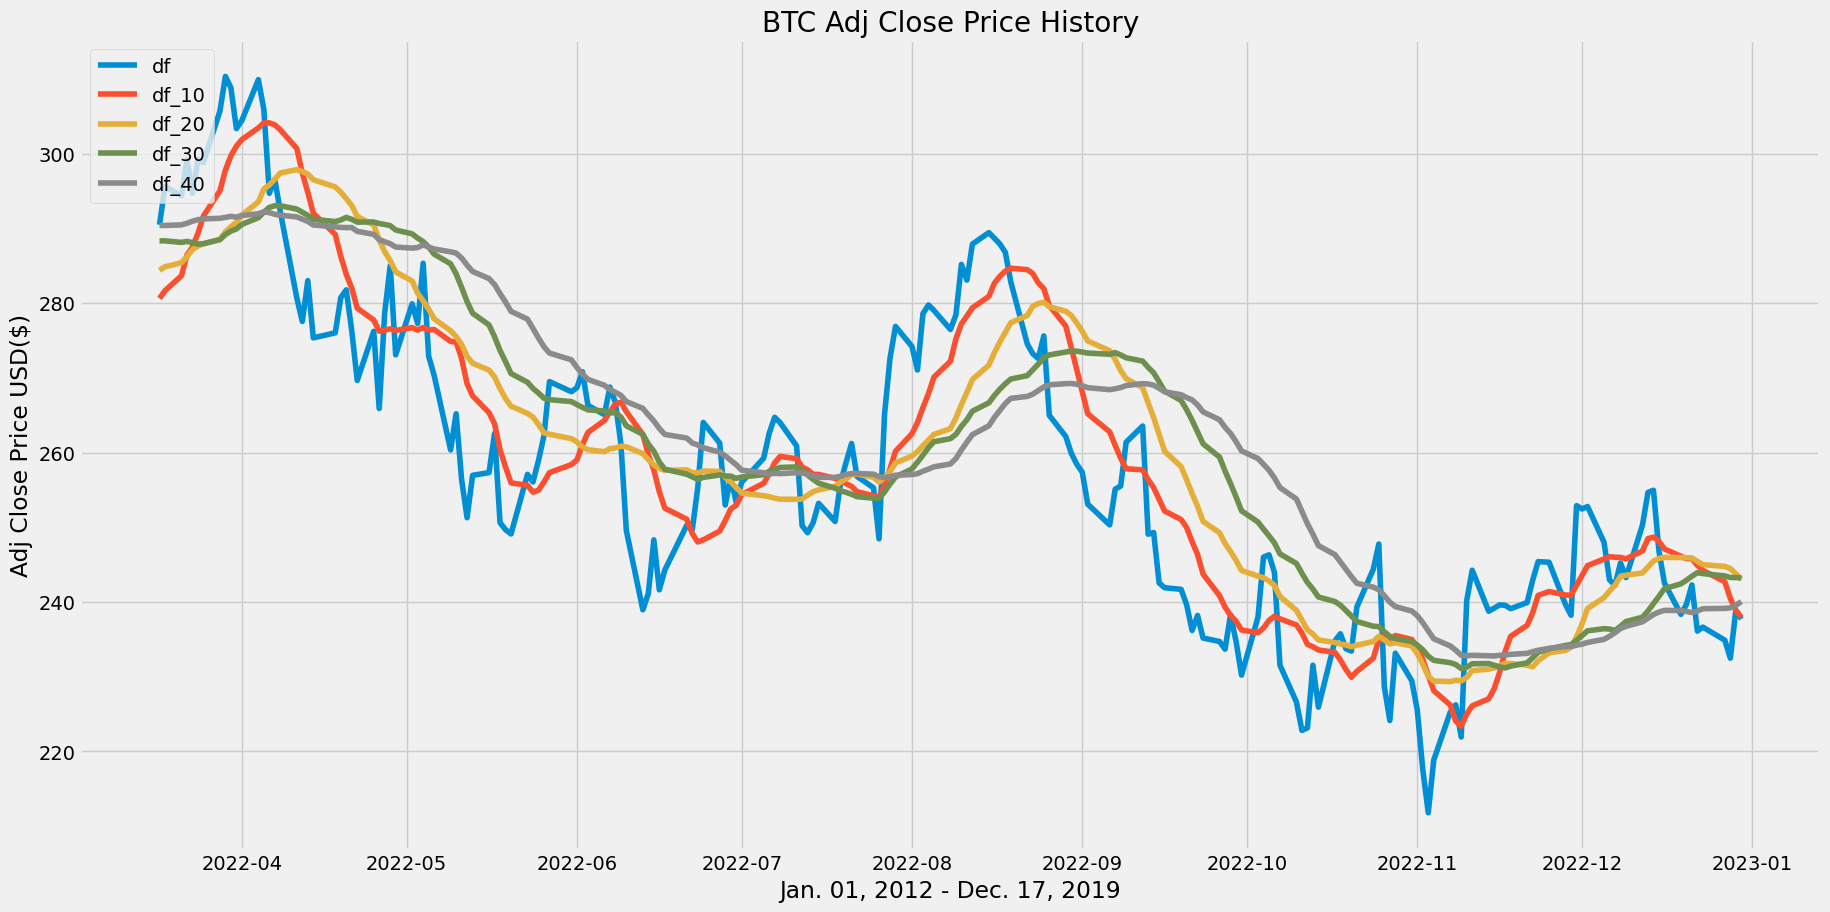

In [ ]:
#Visualize the data
plt.figure(figsize=(20,10))
plt.plot(df['Adj Close'].tail(200), label='df')
plt.plot(df_10['Adj Close'].tail(200), label='df_10')
plt.plot(df_20['Adj Close'].tail(200), label='df_20')
plt.plot(df_30['Adj Close'].tail(200), label='df_30')
plt.plot(df_40['Adj Close'].tail(200), label='df_40')
plt.title('BTC Adj Close Price History')
plt.xlabel('Jan. 01, 2012 - Dec. 17, 2019')
plt.ylabel('Adj Close Price USD($)')
plt.legend(loc='upper left')
plt.show()

In [ ]:
data = df.filter(['Adj Close'])
data.head()

,Adj Close
Date,
2014-12-01,42.061859
2014-12-02,41.923416
2014-12-03,41.594688
2014-12-04,42.252178
2014-12-05,41.888817


In [ ]:
#Convert the dataframe to a numpy array
dataset = data.values

In [ ]:
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

1629

In [ ]:
# Scale the data
scaler = MinMaxScaler()#feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data, scaled_data.shape

(array([[0.02354823],
        [0.02308979],
        [0.02200124],
        ...,
        [0.6540624 ],
        [0.67533172],
        [0.6714258 ]]),
 (2036, 1))

In [ ]:
# Create the training data set
train_data = scaled_data[0:training_data_len,:]
## Split the data into train and test
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()
print(len(x_train))
print(len(y_train))

[array([0.02354823, 0.02308979, 0.02200124, 0.02417846, 0.02297522,
       0.02091267, 0.02059757, 0.0186208 , 0.01939437, 0.01876411,
       0.01796193, 0.01363619, 0.01529778, 0.02039701, 0.02079811,
       0.02171473, 0.02306121, 0.02217312, 0.02142828, 0.02019639,
       0.01896462, 0.01733172, 0.01821975, 0.01698791, 0.01503993,
       0.01670147, 0.02059757, 0.01945162, 0.01776141, 0.01707387,
       0.01592796, 0.01455294, 0.01673011, 0.01715985, 0.0158134 ,
       0.01927978, 0.01942297, 0.01893595, 0.00647435, 0.00226315,
       0.00461224, 0.        , 0.00252097, 0.00343772, 0.00412526,
       0.00587275, 0.00575812, 0.00561494, 0.00630244, 0.00567223,
       0.00770617, 0.00994066, 0.00999836, 0.00985409, 0.00976757,
       0.0108062 , 0.01164292, 0.01146976, 0.01118127, 0.01138323])]
[0.010777349923300969]

[array([0.02354823, 0.02308979, 0.02200124, 0.02417846, 0.02297522,
       0.02091267, 0.02059757, 0.0186208 , 0.01939437, 0.01876411,
       0.01796193, 0.01363619, 0.0

In [ ]:
#Conver the x_train and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1569, 60, 1)

In [ ]:
# Original dataset length
total_data_len = len(data)

# Calculate the end index for the training data
end_index_training_data = training_data_len - 1

# Extract the corresponding dates from the original dataframe
start_date_training_data = df.index[60]  # 60 is the window size used in the loop
end_date_training_data = df.index[end_index_training_data]

print(f"Training Data: {start_date_training_data} to {end_date_training_data}")

Training Data: 2015-02-27 00:00:00 to 2021-05-20 00:00:00


In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
394/394 [==============================] - 22s 34ms/step - loss: 0.0092
Epoch 2/10
394/394 [==============================] - 11s 28ms/step - loss: 0.0023
Epoch 3/10
394/394 [==============================] - 10s 26ms/step - loss: 0.0019
Epoch 4/10
394/394 [==============================] - 11s 29ms/step - loss: 0.0015
Epoch 5/10
394/394 [==============================] - 11s 28ms/step - loss: 0.0014
Epoch 6/10
394/394 [==============================] - 11s 29ms/step - loss: 0.0011
Epoch 7/10
394/394 [==============================] - 10s 26ms/step - loss: 9.9779e-04
Epoch 8/10
394/394 [==============================] - 10s 27ms/step - loss: 9.8437e-04
Epoch 9/10
394/394 [==============================] - 12s 31ms/step - loss: 9.3170e-04
Epoch 10/10
394/394 [==============================] - 11s 28ms/step - loss: 6.7476e-04


In [ ]:
## Create the testing data set
test_data = scaled_data[training_data_len-60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, : ]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
# Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
# Get the model predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

4/4 [==============================] - 1s 21ms/step


In [ ]:
print(predictions[0:5], y_test[0:5])

[[90.77863 ]
 [91.002396]
 [91.19487 ]
 [91.31741 ]
 [91.46302 ]] [[91.40258789]
 [91.27481079]
 [91.22491455]
 [91.5282135 ]
 [91.94244385]]


In [ ]:
# Get the MSE & RMSE
mse = np.mean(predictions-y_test)**2
rmse = np.sqrt(np.mean(predictions-y_test)**2)
mse, rmse

(0.07634523906546264, 0.27630642241081305)

<ipython-input-22-59aa11c1e83f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


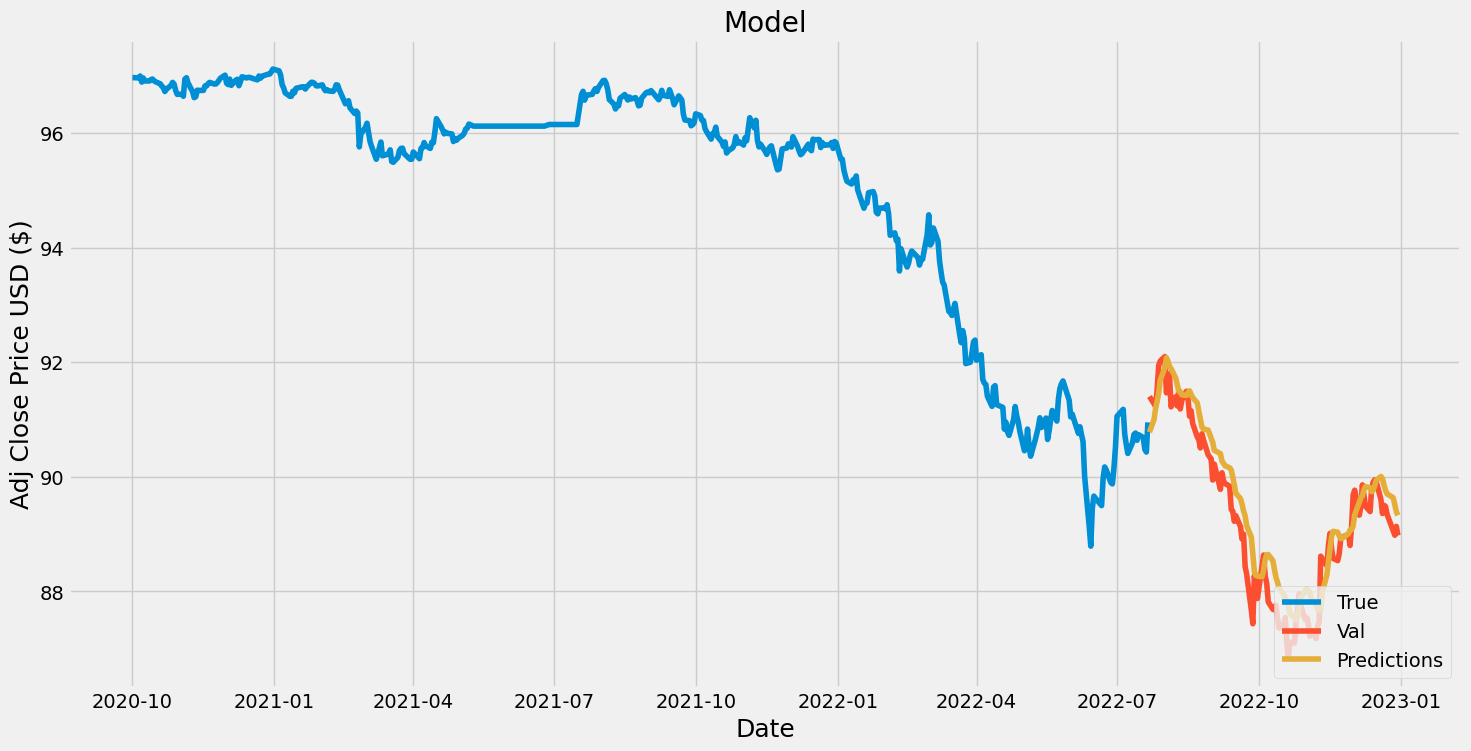

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj Close Price USD ($)', fontsize=18)
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close','Predictions']])
plt.legend(['True', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [ ]:
!pip install pandas_datareader --upgrade

In [ ]:
ticker_symbol = 'BTC'
start_date = '2014-12-01'
end_date = '2022-12-31'

# Fetch historical data using yfinance
BTC_quote = yf.download(ticker_symbol, start=start_date, end=end_date)

# Create a new dataframe
new_df = BTC_quote.filter(['Adj Close'])

# Check for missing values and drop them
new_df = new_df.dropna()

# Check if you have at least 60 days of data
if len(new_df) < 60:
    raise ValueError("Insufficient data. Ensure you have at least 60 days of historical data.")

# Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values

# Scale the data to be values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
last_60_days_scaled = scaler.fit_transform(last_60_days)

# Create an empty list
X_test = []

# Append the past 60 days
X_test.append(last_60_days_scaled)

# Convert the X_test data set to a numpy array
X_test = np.array(X_test)

# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get the predicted scaled price
pred_price = model.predict(X_test)

# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%%**********************]  1 of 1 completed
1/1 [==============================] - 0s 38ms/step
[[89.102776]]


In [ ]:
ticker_symbol = 'BTC'

# Set up start and end dates
start_date = '2014-12-01'
end_date = '2022-12-31'
# Fetch historical data using yfinance
BTC_quote2 = yf.download(ticker_symbol, start=start_date, end=end_date)
BTC_quote2.tail(1)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-30,90.431702,90.431702,90.431702,90.431702,88.976685,33


In [ ]:
import pandas as pd
import numpy as np
import pandas_datareader as web
import matplotlib.pyplot as plt
%matplotlib inline
import prophet

In [ ]:
df = df.reset_index()

In [ ]:
df.shape, df.tail(), df.columns

((567, 7),
           Date       Open       High        Low      Close  Adj Close  Volume
 562 2022-12-23  90.771004  90.804497  90.760002  90.804497  89.343491    1308
 563 2022-12-27  90.509598  90.509598  90.509598  90.509598  89.053337      15
 564 2022-12-28  90.420998  90.434700  90.420998  90.434700  88.979645     168
 565 2022-12-29  90.592300  90.592300  90.592300  90.592300  89.134705      84
 566 2022-12-30  90.431702  90.431702  90.431702  90.431702  88.976685      33,
 Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object'))

In [ ]:
df = df.filter(['Date','Adj Close'])
df.head()

,Date,Adj Close
0,2020-10-01,96.966400
1,2020-10-02,96.966400
2,2020-10-05,96.961555
3,2020-10-06,96.995491
4,2020-10-07,96.888824


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       567 non-null    datetime64[ns]
 1   Adj Close  567 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 9.0 KB


In [ ]:
df.index[df['Adj Close'] < 0]

Int64Index([], dtype='int64')

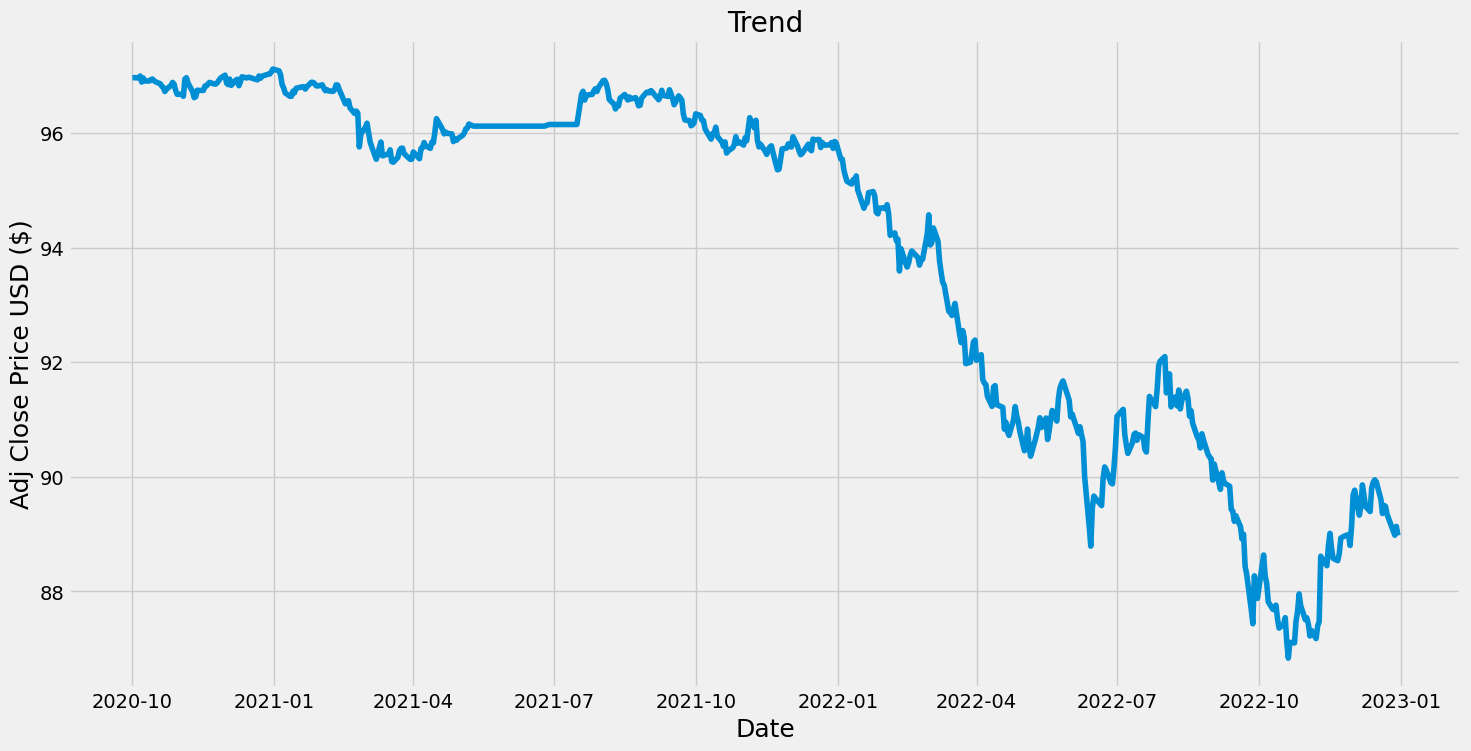

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df['Date'], df['Adj Close'])
plt.title('Trend')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# yt = yt-y(t-1)
df['Adj Close_shift'] = df['Adj Close'] - df['Adj Close'].shift(1)
y = df['Adj Close_shift']

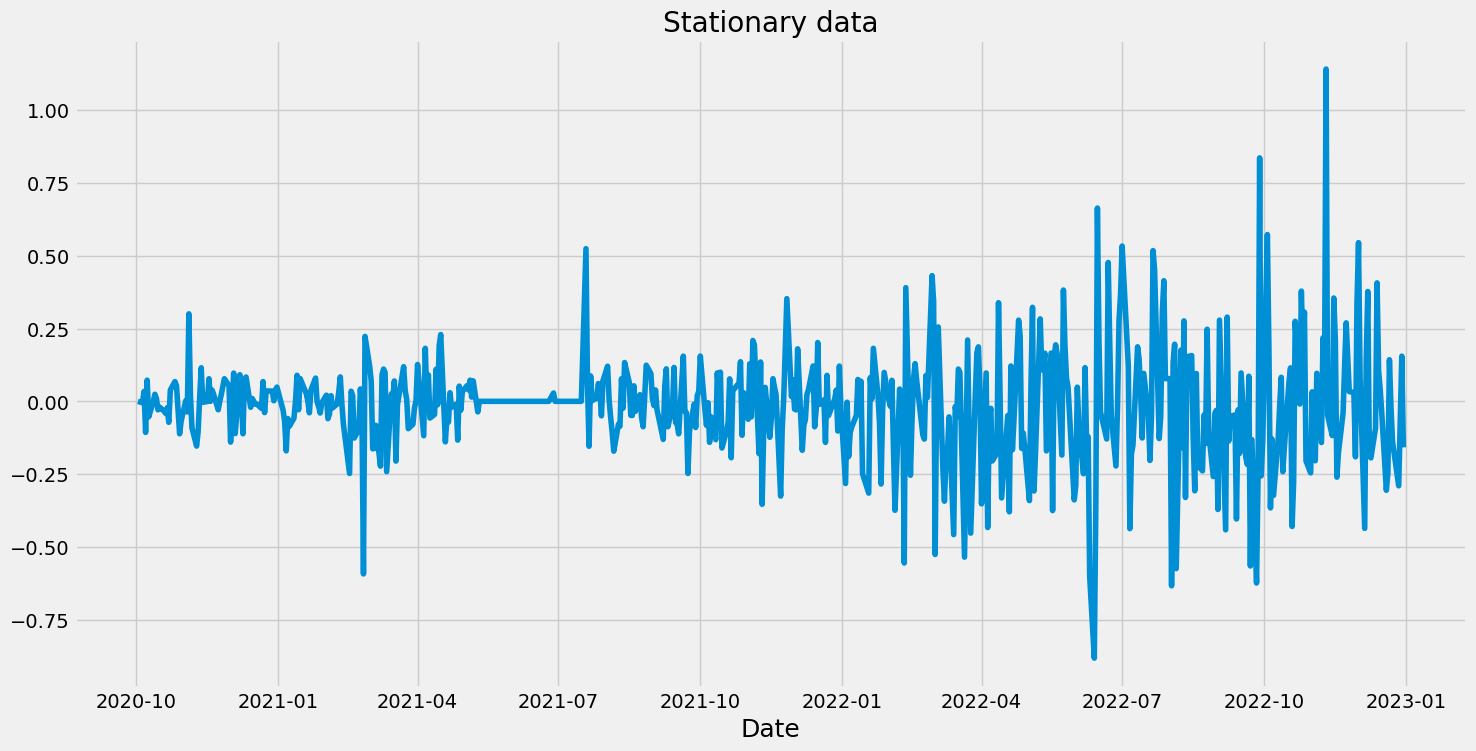

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df['Date'],df['Adj Close_shift'])
plt.title('Stationary data')
plt.xlabel('Date', fontsize=18)
plt.show()

In [ ]:
from prophet import Prophet

In [ ]:
model = Prophet()

In [ ]:
df.columns

Index(['Date', 'Adj Close', 'Adj Close_shift'], dtype='object')

In [ ]:
## Rename the columns as ds and y
df_pht = df.rename(columns={'Date':'ds', 'Adj Close_shift':'y'})#, inplace=True)

In [ ]:
df_pht.head()

,ds,Adj Close,y
0,2020-10-01,96.966400,NaN
1,2020-10-02,96.966400,0.000000
2,2020-10-05,96.961555,-0.004845
3,2020-10-06,96.995491,0.033936
4,2020-10-07,96.888824,-0.106667


In [ ]:
## Split the Data
train_data_len = int(0.8*len(df))
train_data_len

453

In [ ]:
df_train = df_pht[:train_data_len]
df_test = df_pht[train_data_len:]
df_train.head(), df_train.shape

(          ds  Adj Close         y
 0 2020-10-01  96.966400       NaN
 1 2020-10-02  96.966400  0.000000
 2 2020-10-05  96.961555 -0.004845
 3 2020-10-06  96.995491  0.033936
 4 2020-10-07  96.888824 -0.106667,
 (453, 3))

In [ ]:
model.fit(df_train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptk0b9r8h/gmv859sn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptk0b9r8h/2ikhc7g5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29796', 'data', 'file=/tmp/tmptk0b9r8h/gmv859sn.json', 'init=/tmp/tmptk0b9r8h/2ikhc7g5.json', 'output', 'file=/tmp/tmptk0b9r8h/prophet_modelhb_zad60/prophet_model-20231220151953.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:19:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
periods = len(df)-len(df_train)
periods

114

In [ ]:
# Create Future Datas of len(df)-len(df_train) days
future_dates = model.make_future_dataframe(periods=periods)

In [ ]:
# Shape after adding 401 days
future_dates.shape

(566, 1)

In [ ]:
future_dates.head()

,ds
0,2020-10-02
1,2020-10-05
2,2020-10-06
3,2020-10-07
4,2020-10-08


In [ ]:
# Make Prediction
prediction = model.predict(future_dates)

In [ ]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-10-02,0.006726,-0.198033,0.233804,0.006726,0.006726,0.005147,0.005147,0.005147,0.005147,0.005147,0.005147,0.0,0.0,0.0,0.011873
1,2020-10-05,0.006520,-0.224199,0.192930,0.006520,0.006520,-0.018994,-0.018994,-0.018994,-0.018994,-0.018994,-0.018994,0.0,0.0,0.0,-0.012474
2,2020-10-06,0.006452,-0.201584,0.214138,0.006452,0.006452,-0.000491,-0.000491,-0.000491,-0.000491,-0.000491,-0.000491,0.0,0.0,0.0,0.005961
3,2020-10-07,0.006383,-0.187411,0.232061,0.006383,0.006383,0.017521,0.017521,0.017521,0.017521,0.017521,0.017521,0.0,0.0,0.0,0.023904
4,2020-10-08,0.006314,-0.180220,0.210897,0.006314,0.006314,0.003544,0.003544,0.003544,0.003544,0.003544,0.003544,0.0,0.0,0.0,0.009858


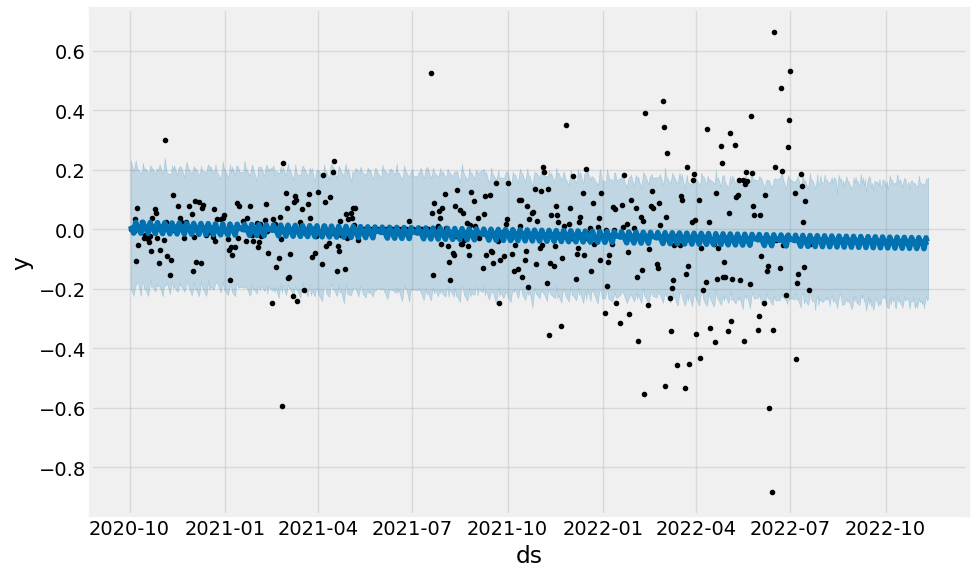

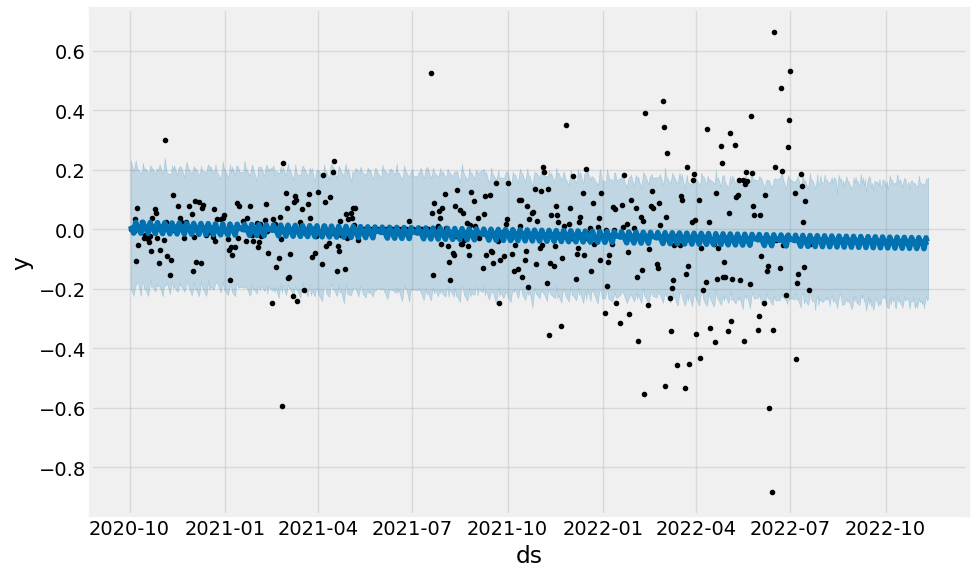

In [ ]:
# Plot Our Predictions
model.plot(prediction)

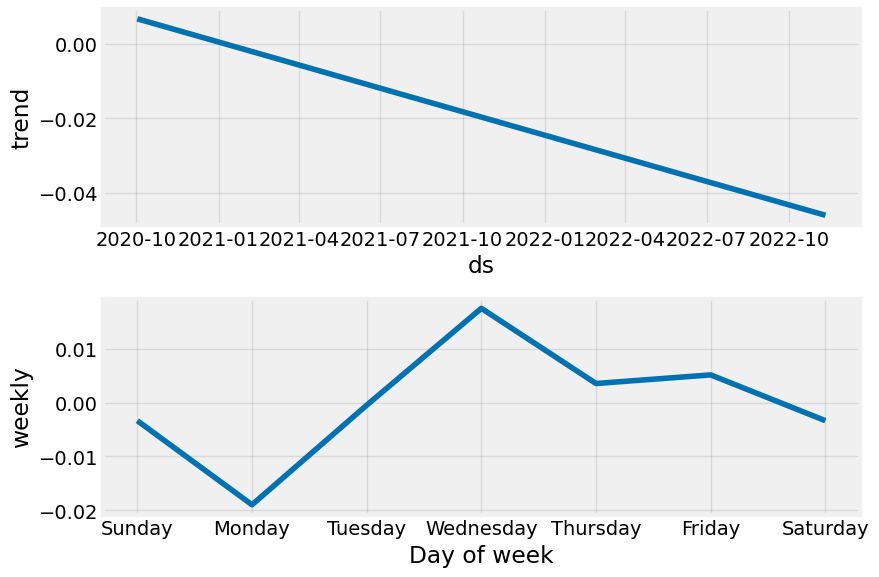

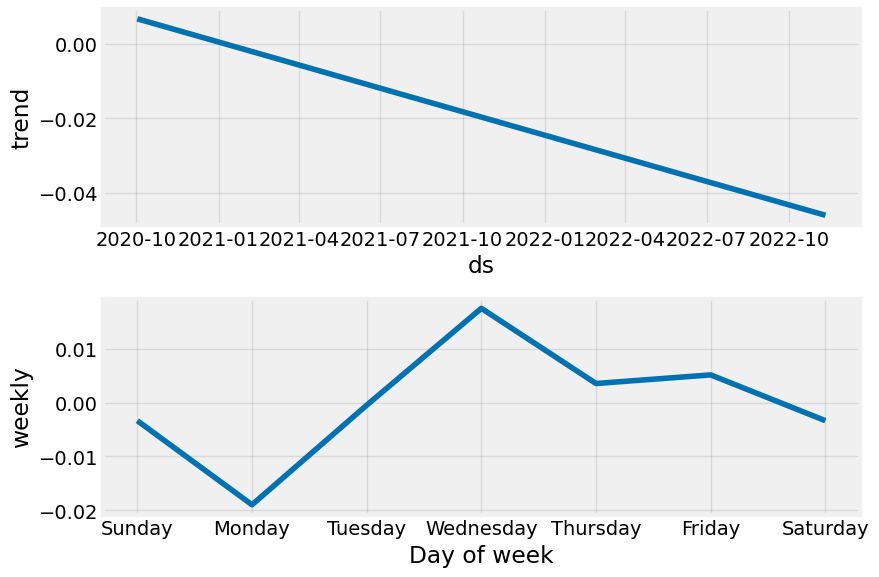

In [ ]:
model.plot_components(prediction)

In [ ]:
from prophet.diagnostics import cross_validation

In [ ]:
df_train.shape, len(df)-len(df_train)

((453, 3), 114)

In [ ]:
cv = cross_validation(model, initial='600 days', period='1 days', horizon='427 days')

ValueError: ignored

In [ ]:
cv.head(), cv.shape

NameError: ignored

In [ ]:

from prophet.diagnostics import performance_metrics

In [ ]:
df_train_pm = performance_metrics(cv)

NameError: ignored

In [ ]:
df_train_pm

NameError: ignored

In [ ]:
MSE = sum(df_train_pm['mse'])/len(df_train_pm)
RMSE = sum(df_train_pm['rmse'])/len(df_train_pm)
MSE, RMSE

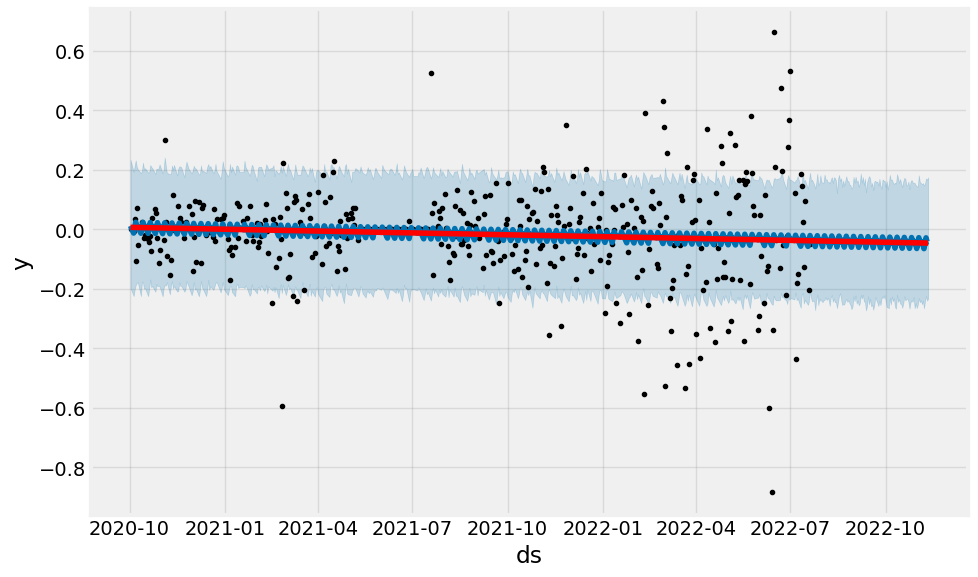

In [ ]:

from prophet.plot import add_changepoints_to_plot
fig = model.plot(prediction)
a = add_changepoints_to_plot(fig.gca(), model, prediction)

In [ ]:
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(cv,metric='rmse')

NameError: ignored

In [ ]:
import numpy as np
import pandas as pd
import os
import pandas_datareader as web
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import datetime
warnings.filterwarnings('ignore')

In [ ]:
DF=BTC
df=DF

In [ ]:
df

In [ ]:
df = df.reset_index()

In [ ]:
df.columns

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df['Date'],df['Adj Close'])
plt.title('Trend')
plt.xlabel('Date', fontsize=18)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result = adfuller(df['Adj Close'])

In [ ]:
#H0: It is non stationary
#H1: It is stationary

def adfuller_test(Adj_Close):
  result = adfuller(Adj_Close)
  labels = ['ADF Test Statistics','p-value','#Lags Used','Number of Observations Used']
  for value,label in zip(result,labels):
    print(label+' : '+str(value))
  if result[1] <= 0.05:
    print("Strong evidence against the null hypothesis(H0), reject the null hypothesis,i.e. data is stationary")
  else:
    print("Weak evidence against the null hypothesis(H0), means accept the null hypothesis, i.e. data is non stationary")

In [ ]:
adfuller_test(df['Adj Close'])

In [ ]:
df['Adj Close_shift'] = df['Adj Close'] - df['Adj Close'].shift(1)
df['Adj Close_shift'] = df['Adj Close_shift'].fillna(method='bfill')
df['Adj Close_shift']

In [ ]:
test_result = adfuller(df['Adj Close_shift'])

In [ ]:
#H0: It is non stationary
#H1: It is stationary

def adfuller_test(Adj_Close):
  result = adfuller(Adj_Close)
  labels = ['ADF Test Statistics','p-value','#Lags Used','Number of Observations Used']
  for value,label in zip(result,labels):
    print(label+' : '+str(value))
  if result[1] <= 0.05:
    print("Strong evidence against the null hypothesis(H0), reject the null hypothesis,i.e. data is stationary")
  else:
    print("Weak evidence against the null hypothesis(H0), means accept the null hypothesis, i.e. data is non stationary")

In [ ]:
adfuller_test(df['Adj Close_shift'])

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df['Date'],df['Adj Close_shift'])
plt.title("APPLE First Difference")
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm


fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Adj Close_shift'].iloc[1:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Adj Close_shift'].iloc[1:],lags=40,ax=ax2)

In [ ]:
train_data, test_data = df[0:int(len(df)*0.5)], df[int(len(df)*0.9):]
plt.figure(figsize=(16,8))
plt.title('Apple Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Adj Close_shift'], label='Training Data')
plt.plot(test_data['Adj Close_shift'], 'green', label='Testing Data')
plt.xticks(np.arange(0,1857, 300), df['Date'][0:2000:300])
plt.legend()

In [ ]:
import statsmodels.api

In [ ]:
#p=1, d=0, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA


#model=ARIMA(train_data['Adj Close_shift'],order=(1,1,1))
model=statsmodels.tsa.arima.model.ARIMA(df['Adj Close_shift'],order=(1,0,1))
model_fit=model.fit()


#model_fit.summary()


from pandas import DataFrame
residuals = DataFrame(model_fit.resid)
plt.figure(figsize=(16,8))
#residuals.plot()
plt.plot(residuals)

In [ ]:
residuals.plot(kind='kde')

In [ ]:
residuals.describe()

In [ ]:
train_arima = train_data['Adj Close_shift'].values
test_arima = test_data['Adj Close_shift'].values

In [ ]:
history = [x for x in train_arima]
print(type(history))
predictions = list()
for t in range(len(test_arima)):
    model = statsmodels.tsa.arima.model.ARIMA(history, order=(1,1,0))
    model_fit = model.fit()
    output = model_fit.predict(start=len(train_arima)+t-1, end = len(train_arima)+t,dynamic=True)
    #output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_arima[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_arima, predictions)
print('MSE : %.3f' % error)
error2 = math.sqrt(error)
print('RMSE : %.3f' % error2)

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', label='Predicted Price')
plt.plot(test_data.index, test_data['Adj Close_shift'], color='red', label='Actual Price')
plt.xticks(np.arange(1486,1856, 60), df['Date'][1486:1856:60])
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()